In [1]:
import pandas as pd

In [3]:
# make a series object
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])
fruits

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

# part I

In [4]:
#1. get the number of elements
fruits.size

17

In [6]:
#2. 
fruits.index

RangeIndex(start=0, stop=17, step=1)

In [7]:
# 3. 
fruits.values

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew', 'kiwi',
       'kiwi', 'kiwi', 'mango', 'blueberry', 'blackberry', 'gooseberry',
       'papaya'], dtype=object)

In [10]:
#4. 
fruits.dtype

dtype('O')

In [11]:
#5.
fruits.head()

0          kiwi
1         mango
2    strawberry
3     pineapple
4    gala apple
dtype: object

In [12]:
fruits.tail(3)

14    blackberry
15    gooseberry
16        papaya
dtype: object

In [14]:
fruits.sample(2)

12     mango
16    papaya
dtype: object

In [15]:
#6.
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [43]:
#7.
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [24]:
#8.
fruits.value_counts()

kiwi                4
mango               2
strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

In [25]:
#9.
fruit_counts = fruits.value_counts()
fruit_counts.nlargest(n=1)

kiwi    4
dtype: int64

In [28]:
#10.
fruit_counts.nsmallest(n=1, keep='all')

strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

# part II

In [29]:
# 1.
fruits.str.title()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala Apple
5     Honeycrisp Apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [35]:
#2.
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

In [55]:
#3.
vowels = ['a', 'e', 'i', 'o', 'u']
vowel_counts = {'a':0, 'e':0, 'i':0, 'o':0, 'u':0}
for v in vowels:
    vowel_counts[v] = fruits.str.count(v).values.sum()
vowel_counts

{'a': 14, 'e': 15, 'i': 10, 'o': 9, 'u': 1}

In [61]:
#4
max(fruits.values, key=len)

'honeycrisp apple'

In [70]:
fruits.str.len().max()

16

In [69]:
#5
fruits[fruits.str.len() >= 5]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [77]:
#6
contains_o = lambda s: True if s.count('o') >= 2 else False
fruits[fruits.apply(contains_o)]

6         tomato
15    gooseberry
dtype: object

In [84]:
#7
contains_berry = lambda s: True if s.find('berry') >= 0  else False
fruits[fruits.apply(contains_berry)]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [86]:
#8
contains_apple = lambda s: True if s.find('apple') >= 0  else False
fruits[fruits.apply(contains_apple)]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [95]:
# 9 is there are more pandas-centric method of doing this?
vowels = ['a', 'e', 'i', 'o', 'u']
vowel_count = sum([fruits.str.count(v) for v in vowels])
fruits[vowel_count.max()]

'honeycrisp apple'

# part III

In [102]:
letters = pd.Series(list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'))
letters

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [104]:
# 1. Which letter occurs the most frequently in the letters Series?
letters.value_counts().head(1)

y    13
dtype: int64

In [105]:
# 2. Which letter occurs the Least frequently?
letters.value_counts().tail(1)

l    4
dtype: int64

In [117]:
# 3. How many vowels are in the Series?

#make a lambda to determine the mask then count the masked series object
letters_count=letters.value_counts()
is_vowel = lambda char: True if char in ('a', 'e', 'i', 'o', 'u') else False
letters[letters.apply(is_vowel)].count()

34

In [118]:
# 4. How many consonants are in the Series?
is_consonant = lambda char: True if char not in ('a', 'e', 'i', 'o', 'u') else False
letters[letters.apply(is_consonant)].count()

166

In [119]:
# 5. Create a Series that has all of the same letters but uppercased.
upper_letters = letters.str.upper()
upper_letters

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

<AxesSubplot:>

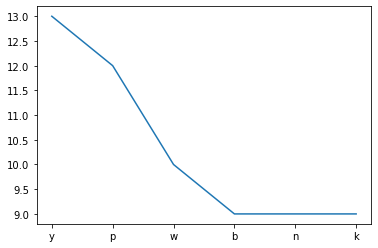

In [143]:
# 6. Create a bar plot of the frequencies of the 6 most commonly occuring letters.

#get a list of the frequency
frequency_series = pd.Series(data=letters.value_counts().head(6))
frequency_series.plot()